<a href="https://colab.research.google.com/github/vitaldavi/Exploring-ML-Models/blob/main/Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

## Dataset and Manipulations

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope]. Irvine, CA: University of California, School of Information and Computer Science.

In [ ]:
data = pd.read_csv("magic04.data")
data

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [ ]:
# Creating columns names by a list
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

# Indexing to our dataframe
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Feature's Histograms

We can also plot the histograms of the features to visualize their behavior. This is gonna be useful as some models like Naive Bayes assumes that our continuous variables (features) are normally distributed.

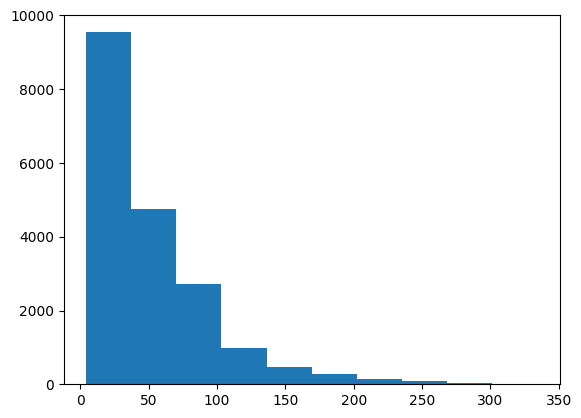

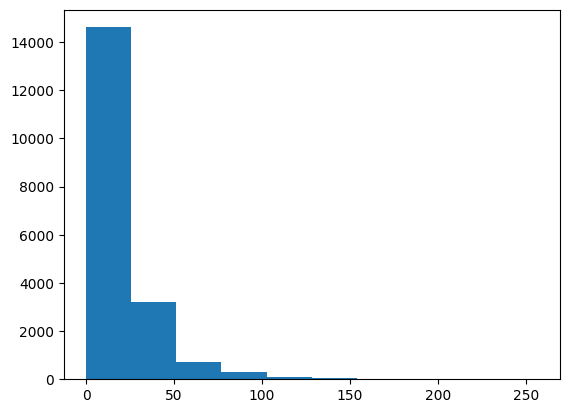

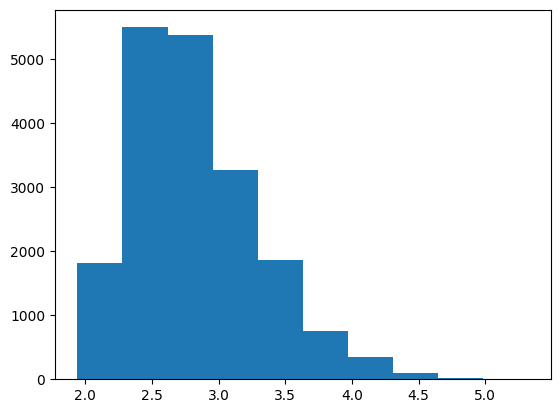

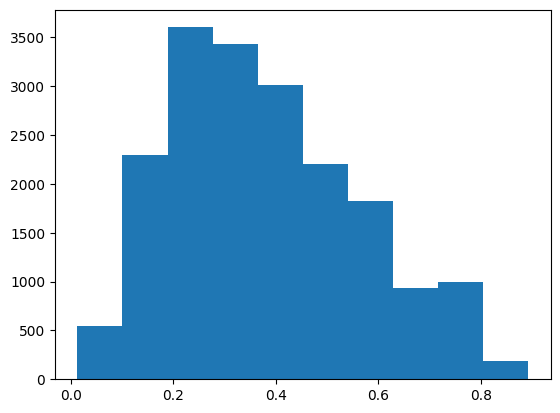

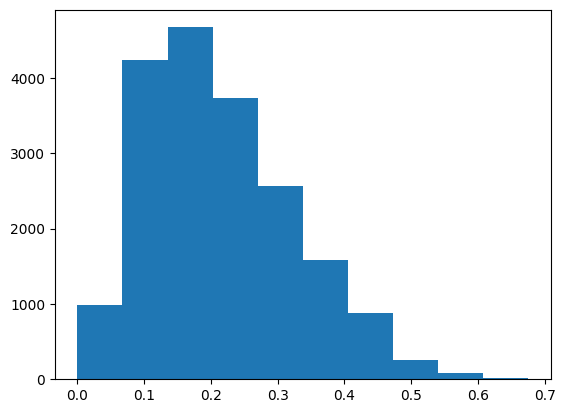

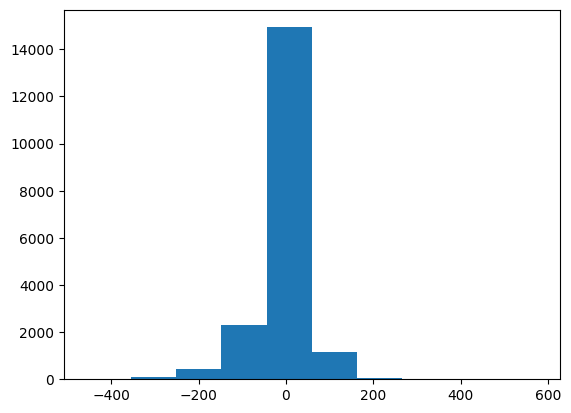

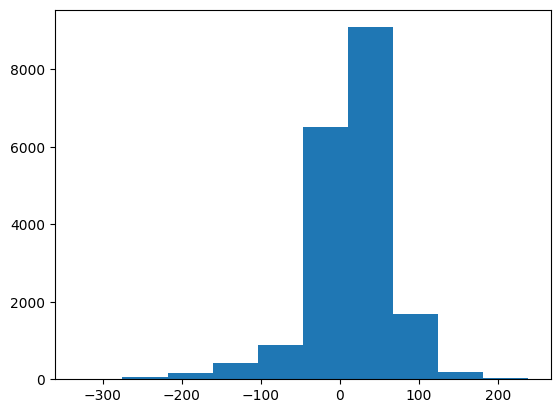

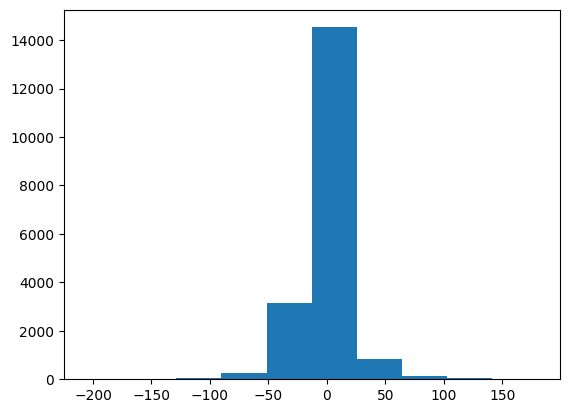

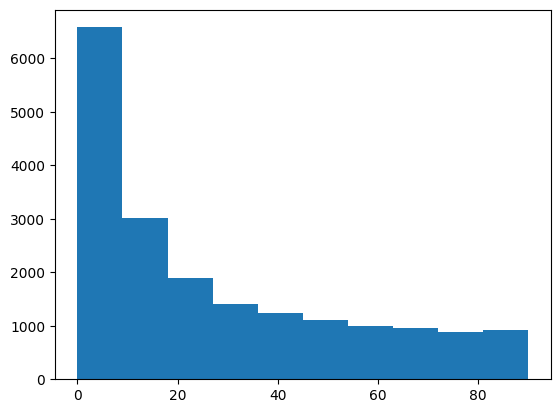

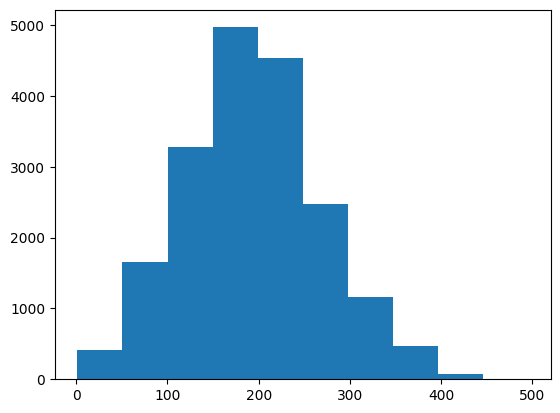

In [ ]:
# Plotting the histograms of the features (labels)
for label in cols[:-1]:
  plt.hist(df[label])
  plt.ylabel('')
  plt.xlabel('')
  plt.show()

In [ ]:
import seaborn as sns
for label in cols[:-1]:
  sns.displot(df, x=df[label], hue=df['class'], kind='kde')

### Log-Transformation

Note that all features have a assymetry behavior in their distributions. Therefore, we can make a log-transformation to smooth their scale. Let's apply and visualize again.

In [ ]:
def log_transform_df(df):
  for label in cols[:-1]:
    df[label] = np.log(df[label])

    return df

In [ ]:
df_log = log_transform_df(df)
df_log

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,3.360261,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,3.453271,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,5.087917,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3.170408,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4.319302,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,3.062671,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,3.365404,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,4.323411,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,4.791762,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [ ]:
# Reset original df
df = pd.read_csv("magic04.data", names=cols)

In [ ]:
plt.hist(df['fLength']);

In [ ]:
plt.hist(df_log['fLength']);

In [ ]:
sns.displot(df, x=df['fLength'], kind='kde')

In [ ]:
sns.displot(df_log, x=df_log['fLength'], kind='kde')

In [ ]:
import seaborn as sns
for label in cols[:-1]:
  sns.displot(df_log, x=df_log[label], hue=df['class'], kind='kde')

### Bining the 'class' feature (labeled)

In [ ]:
# Visualizing the values of 'class' column
df["class"].unique()

# Transforming 'g' and 'h' to 0 and 1, i.e., bining the feature
df["class"] = (df["class"] == "g").astype(int)

# Visualizing again to check 'g' is one (1) and 'h' is zero (0)
df["class"].unique()

array([1, 0])

In [ ]:
# Doing for log-transformed data
#df_log["class"].unique()
#df_log["class"] = (df["class"] == "g").astype(int)
#df_log["class"].unique()

***OBS:*** Our objective will be predict whether the class is gamma ('g') or hadron ('h'). This configures a classification problem and we'll gonna use Machine Learning to solve it. Therefore, we'll be able to pass all features to predict the class behavior in a Supervised Learning way (as we know what are the labels, in this case 'g' and 'h').

But before applying the models, let's gonna explore the data visualizing the behavior of the features comparing them by the classes.

## Exploratory Data Analysis

In [ ]:
# Plotting the all columns histograms and differencing them by the class ('g' or 'h')
for label in cols[:-1]:  # cols[:-1] gets all values of the 'cols' list except the last one, which is 'class'
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True) # all gamma's
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True) # all hadron's
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Note that the feature 'fAlpha' can be a good one to predict whether is 'g' or 'h'.

## Data Samples: Train, Validation & Test

In [ ]:
# Spliting the Data (the first 60% is a train sample, 60%-80% is validation and 80%-100% is test)
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

Note that can exist more 'g' values than 'h' values or vice-versa and this is gonna be an issue for us, since the size of the sample don't match. To fix this, we'll later oversample the least valued sample (in this case, 'h' or 'class' == 0).

In [ ]:
print(len(train[train["class"]==1])) # gamma values in train sample
print(len(train[train["class"]==0])) # hadron values in train sample

7434
3978


***Model:*** Y = β_k*X_k, where Y is our 'class' labeled output and Xk is our values for each one of the k features

In [ ]:
# Scaling the dataset columns to put the features values as relatives to their means and standard deviations
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values # a matrix (2-dimensional array) X that excludes the 'class' column, which is y in our model
  y = dataframe[dataframe.columns[-1]].values  # a vector (1-dimensional array) y

  scaler = StandardScaler()
  X = scaler.fit_transform(X) # fit scale and transform the values of X (Z-transformation, where Z=(x-u)/s

  if oversample:  # prevent the case of being more class values than another (if there is more 'g' or 1 than 'h' or 0, or vice-versa)
    ros = RandomOverSampler() # randomized over sampler (ros)
    X, y = ros.fit_resample(X, y) # fitted resampled X and y

  data = np.hstack((X, np.reshape(y, (-1, 1))))  # stack arrays horizontally (put them side-by-side) and reshape y to 2-dimensional array
  # data = np.hstack((X, np.reshape(y, (len(y), 1)))) # equivalent to the expression above

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False) # we don't oversample to test reliability of the model in new data not seen yet
test, X_test, y_test = scale_dataset(test, oversample=False) # we don't oversample to test reliability of the model in new data not seen yet

Let's check the oversample method.

In [ ]:
print(len(y_train))

14868


In [ ]:
sum(y_train == 1)

7434

In [ ]:
sum(y_train == 0) # exactly half of 'y_train == 1' values

7434

## Machine Learning Models

### K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1320
           1       0.88      0.80      0.84      2484

    accuracy                           0.80      3804
   macro avg       0.78      0.79      0.78      3804
weighted avg       0.81      0.80      0.80      3804



To better visualize how the choice of size of neighbors affect our model's accuracy, we can loop the object 'n_neighbors' and fit the model for all possible values within a range.

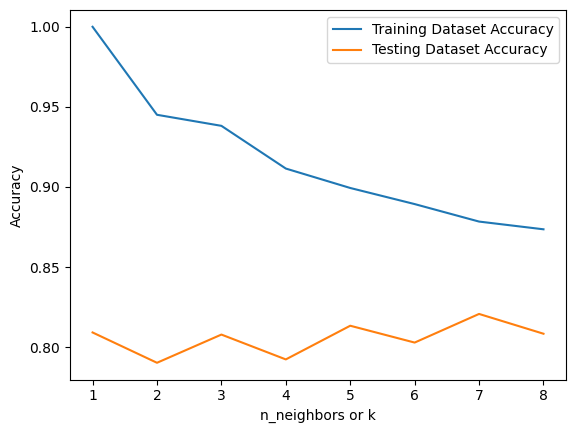

In [ ]:
# Setting initial parameters
neighbors = np.arange(1, 9) # maximum n is 8
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Looping over K values
for i, k in enumerate(neighbors):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train)

  # Compute training and test data accuracy
  train_accuracy[i] = knn_model.score(X_train, y_train)
  test_accuracy[i] = knn_model.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, train_accuracy, label='Train Data')
plt.plot(neighbors, test_accuracy, label='Test Data')
plt.xlabel('n_neighbors or k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1344
           1       0.73      0.90      0.81      2460

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1344
           1       0.84      0.82      0.83      2460

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



## Oversampling Discussion

*Note that oversampling the hadron values to balance the 'class' data generates a less precised classification to hadron labels in ALL models. This is important since when we oversampled, our models can superestimate the frequency of hadron values and, therefore, can be less accurate to predict when this values occur.*

In [ ]:
# Spliting the Data (the first 60% is a train sample, 60%-80% is validation and 80%-100% is test)
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
# Generating train, valid and test samples without oversampling 'train'
train, X_train, y_train = scale_dataset(train, oversample=False)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
print(len(y_train))

11412


In [ ]:
sum(y_train == 1)

7310

In [ ]:
sum(y_train == 0)

4102

Note that: in our train sample, there's approximately the same proportion of 'g' and 'h' values, with 'g' being almost two times more frequent.

### K-Nearest Neighbors (KNN)

In [ ]:
# Implementing KNN Model (this time, without oversampling 'h' class)
knn_model_wo = KNeighborsClassifier(n_neighbors=4)
knn_model_wo = knn_model_wo.fit(X_train, y_train)

In [ ]:
y_pred_wo = knn_model_wo.predict(X_test)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_wo))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1270
           1       0.87      0.89      0.88      2534

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



### Naive Bayes Classifier

In [ ]:
# Implementing Naive Bayes Model (this time, without oversampling 'h' class)
nb_model_wo = GaussianNB()
nb_model_wo = nb_model_wo.fit(X_train, y_train)

In [ ]:
y_pred_wo = nb_model_wo.predict(X_test)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_wo))

              precision    recall  f1-score   support

           0       0.70      0.39      0.50      1270
           1       0.75      0.91      0.82      2534

    accuracy                           0.74      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.73      0.74      0.72      3804



### Logistic Regression

In [ ]:
lg_model_wo = LogisticRegression()
lg_model_wo = lg_model_wo.fit(X_train, y_train)

In [ ]:
y_pred_wo = lg_model_wo.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_wo))

              precision    recall  f1-score   support

           0       0.74      0.62      0.68      1270
           1       0.82      0.89      0.86      2534

    accuracy                           0.80      3804
   macro avg       0.78      0.76      0.77      3804
weighted avg       0.80      0.80      0.80      3804



## Log-Transformation

In [ ]:
# Spliting the Data (the first 60% is a train sample, 60%-80% is validation and 80%-100% is test)
train_log, valid_log, test_log = np.split(df_log.sample(frac=1), [int(0.6*len(df_log)), int(0.8*len(df_log))])

In [ ]:
train_log, X_train_log, y_train_log = scale_dataset(train_log, oversample=False)
valid_log, X_valid_log, y_valid_log = scale_dataset(valid_log, oversample=False)
test_log, X_test_log, y_test_log = scale_dataset(test_log, oversample=False)

### K-Nearest Neighbors

In [ ]:
knn_model_log = KNeighborsClassifier()
knn_model_log = knn_model_log.fit(X_train_log, y_train_log)

In [ ]:
y_pred_log = knn_model_log.predict(X_test_log)

In [ ]:
print(classification_report(y_true=y_test_log, y_pred=y_pred_log))

              precision    recall  f1-score   support

           g       0.85      0.87      0.86      2457
           h       0.76      0.73      0.74      1347

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



### Naive Bayes Classifier

In [ ]:
# Implementing Naive Bayes Model (this time, without oversampling 'h' class)
nb_model_log = GaussianNB()
nb_model_log = nb_model_log.fit(X_train_log, y_train_log)

In [ ]:
y_pred_log = nb_model_log.predict(X_test_log)

In [ ]:
print(classification_report(y_true=y_test_log, y_pred=y_pred_log))

              precision    recall  f1-score   support

           g       0.74      0.89      0.81      2457
           h       0.68      0.42      0.52      1347

    accuracy                           0.72      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.72      0.70      3804



### Logistic Regression

In [ ]:
lg_model_log = LogisticRegression()
lg_model_log = lg_model_log.fit(X_train_log, y_train_log)

In [ ]:
y_pred_log = lg_model_log.predict(X_test_log)

In [ ]:
print(classification_report(y_test_log, y_pred_log))

              precision    recall  f1-score   support

           g       0.85      0.82      0.84      2457
           h       0.69      0.73      0.71      1347

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804

